In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install statsmodels scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [6]:
home_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06


In [7]:
# Step 1: Select the first row (row 0) and keep the 'RegionID', 'SizeRank', etc. as index
home_first_row_df = home_df.iloc[0:1]  # Select the first row

# Step 2: Transpose the first row, keeping only date columns (starting from index 5 onwards)
home_transposed_df = home_first_row_df.iloc[:, 5:].transpose()

# Step 3: Reset the index so that the dates become a column
home_transposed_df = home_transposed_df.reset_index()

# Step 4: Rename the columns for clarity
home_transposed_df.columns = ['Date', 'Price']

# Step 5: Convert the 'Date' column to datetime if necessary
home_transposed_df['Date'] = pd.to_datetime(home_transposed_df['Date'])

# Display the transposed DataFrame
home_transposed_df.head(30)

,Date,Price
0,2000-01-31,123951.733006
1,2000-02-29,124163.176264
2,2000-03-31,124425.524492
3,2000-04-30,124988.958362
4,2000-05-31,125637.500450
5,2000-06-30,126332.566936
6,2000-07-31,127067.517114
7,2000-08-31,127862.053111
8,2000-09-30,128689.553812
9,2000-10-31,129521.615905


In [8]:
# Step 1: Extract the year from the 'Date' column
home_transposed_df['Year'] = home_transposed_df['Date'].dt.year

# Step 2: Filter the DataFrame to only include rows where the year is between 2018 and 2022
home_filtered_df = home_transposed_df[home_transposed_df['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Step 3: Group by 'Year' and calculate the average 'Price' for each year
average_price_by_year = home_filtered_df.groupby('Year')['Price'].mean().reset_index()

# Step 4: Rename the 'Price' column to 'Average Price'
average_price_by_year = average_price_by_year.rename(columns={'Price': 'Average Price'})

# Display the final DataFrame
print(average_price_by_year)

   Year  Average Price
0  2018  231312.598863
1  2019  243067.762580
2  2020  258567.500998
3  2021  298386.401188
4  2022  342811.156554


In [9]:
unemployment_rate_df = pd.read_csv('../Source/UnemploymentRate.csv')
unemployment_rate_df.head(3)

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0


In [10]:
# Rename the unemployment rate column in unemployment_rate_df
unemployment_rate_df = unemployment_rate_df.rename(columns={'DATE': 'Date', 'UNRATE': 'Unemployment Rate'})

# Display the updated DataFrame to verify the change
unemployment_rate_df.head()

,Date,Unemployment Rate
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [11]:
# Step 1: Ensure the 'DATE' column is in datetime format
unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df['Date'])

# Step 2: Filter the rows for the years 2018 to 2022
unemployment_filtered_df = unemployment_rate_df[unemployment_rate_df['Date'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Display the filtered DataFrame
unemployment_filtered_df.head()

,Date,Unemployment Rate
840,2018-01-01,4.0
841,2018-02-01,4.1
842,2018-03-01,4.0
843,2018-04-01,4.0
844,2018-05-01,3.8


In [12]:
# Step 1: Extract the year from the 'Date' column in the unemployment data
unemployment_filtered_df['Year'] = unemployment_filtered_df['Date'].dt.year

# Step 2: Group by 'Year' and calculate the average 'Unemployment Rate' for each year
average_unemployment_by_year = unemployment_filtered_df.groupby('Year')['Unemployment Rate'].mean().reset_index()

# Step 3: Rename the 'Unemployment Rate' column to 'Average Unemployment Rate'
average_unemployment_by_year = average_unemployment_by_year.rename(columns={'Unemployment Rate': 'Average Unemployment Rate'})

# Step 4: Filter the DataFrame for only the years 2018 to 2022
average_unemployment_by_year = average_unemployment_by_year[average_unemployment_by_year['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Display the final DataFrame
print(average_unemployment_by_year)

   Year  Average Unemployment Rate
0  2018                   3.891667
1  2019                   3.675000
2  2020                   8.091667
3  2021                   5.350000
4  2022                   3.633333


C:\Users\taire\AppData\Local\Temp\ipykernel_8912\556528344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_filtered_df['Year'] = unemployment_filtered_df['Date'].dt.year


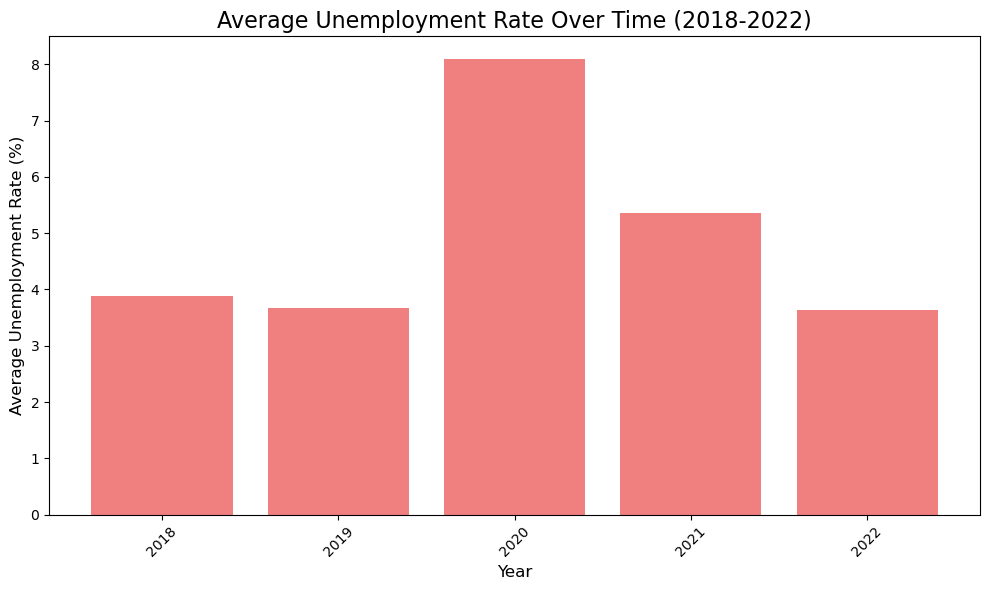

In [26]:
# Create a bar graph of Average Unemployment Rate over time
plt.figure(figsize=(10, 6))
plt.bar(average_unemployment_by_year['Year'], average_unemployment_by_year['Average Unemployment Rate'], color='lightcoral')

# Customize the plot
plt.title('Average Unemployment Rate Over Time (2018-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()

In [43]:
# Ensure that the 'Date' column is in datetime format
unemployment_filtered_df['Date'] = pd.to_datetime(unemployment_filtered_df['Date'])

# Filter the data for the years 2018 to 2022
unemployment_filtered = unemployment_filtered_df[(unemployment_filtered_df['Date'] >= '2018-01-01') & (unemployment_filtered_df['Date'] <= '2022-12-31')]

# Set 'Date' as the index for better formatting in the JSON output
unemployment_filtered.set_index('Date', inplace=True)

# Output the filtered data to a JSON file
unemployment_filtered.to_json('unemployment_data_2018_2022.json', orient='index', date_format='iso')

print("Data successfully written to 'unemployment_data_2018_2022.json'.")

Data successfully written to 'unemployment_data_2018_2022.json'.


C:\Users\taire\AppData\Local\Temp\ipykernel_8912\79815219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_filtered_df['Date'] = pd.to_datetime(unemployment_filtered_df['Date'])


In [13]:
# Read in mortgage rate data
mortgage_rate_df = pd.read_csv('../Source/MORTGAGE30US.csv')
mortgage_rate_df.head()

,DATE,MORTGAGE30US
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29


In [14]:
# Rename the mortgage rate column in mortage_rate_df
mortgage_rate_df = mortgage_rate_df.rename(columns={'DATE': 'Date','MORTGAGE30US': '30 YR Mortgage Rate'})

# Display the updated DataFrame to verify the change
mortgage_rate_df.head()

,Date,30 YR Mortgage Rate
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29


In [15]:
# Step 1: Ensure the 'DATE' column is in datetime format
mortgage_rate_df['Date'] = pd.to_datetime(mortgage_rate_df['Date'])

# Step 2: Filter the rows for the years 2018 to 2022
mortgage_filtered_df = mortgage_rate_df[mortgage_rate_df['Date'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Display the filtered DataFrame
mortgage_filtered_df.head()

,Date,30 YR Mortgage Rate
2440,2018-01-04,3.95
2441,2018-01-11,3.99
2442,2018-01-18,4.04
2443,2018-01-25,4.15
2444,2018-02-01,4.22


In [16]:
# Step 1: Extract the year from the 'Date' column in the mortgage data
mortgage_filtered_df['Year'] = mortgage_filtered_df['Date'].dt.year

# Step 2: Group by 'Year' and calculate the average '30 yr mortgage rate' for each year
average_mortgage_by_year = mortgage_filtered_df.groupby('Year')['30 YR Mortgage Rate'].mean().reset_index()

# Step 3: Rename the '30 yr mortgage rate' column to 'Average 30 yr mortgage rate'
average_mortgage_by_year = average_mortgage_by_year.rename(columns={'30 YR Mortgage Rate': 'Average 30 YR Mortgage Rate'})

# Step 4: Filter the DataFrame for only the years 2018 to 2022
average_mortgage_by_year = average_mortgage_by_year[average_mortgage_by_year['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Display the final DataFrame
print(average_mortgage_by_year)

   Year  Average 30 YR Mortgage Rate
0  2018                     4.544615
1  2019                     3.935769
2  2020                     3.111698
3  2021                     2.957692
4  2022                     5.344038


C:\Users\taire\AppData\Local\Temp\ipykernel_8912\501049217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage_filtered_df['Year'] = mortgage_filtered_df['Date'].dt.year


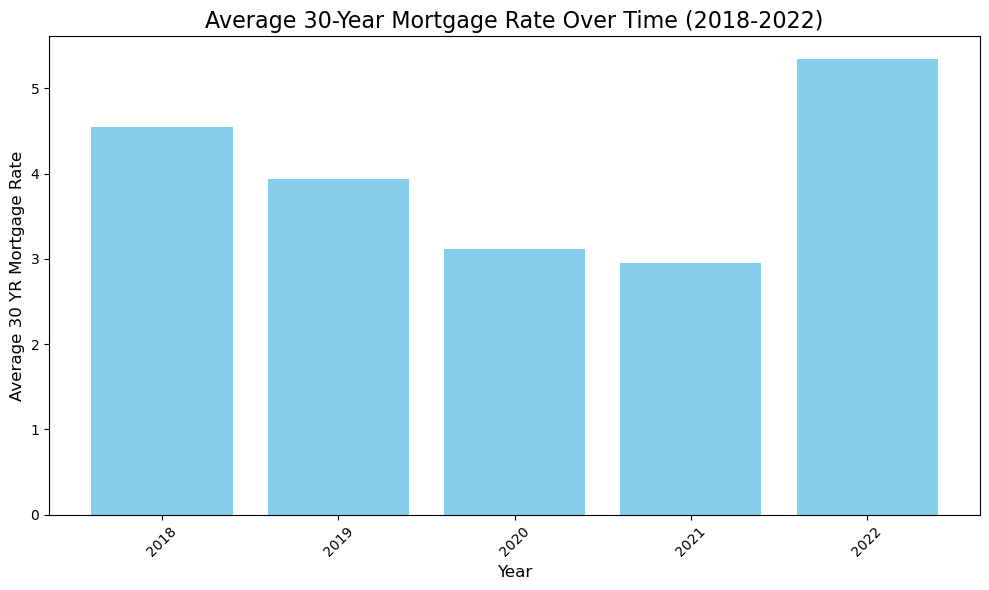

In [25]:
# Create a bar graph of Average 30 YR Mortgage Rate over time
plt.figure(figsize=(10, 6))
plt.bar(average_mortgage_by_year['Year'], average_mortgage_by_year['Average 30 YR Mortgage Rate'], color='skyblue')

# Customize the plot
plt.title('Average 30-Year Mortgage Rate Over Time (2018-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average 30 YR Mortgage Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()

In [44]:
# Assuming the DataFrame 'average_mortgage_by_year' is already loaded and filtered
# Ensure that 'Year' is properly set as the index (if not already done)
average_mortgage_by_year.set_index('Year', inplace=True)

# Filter the data for the years 2018 to 2022
average_mortgage_filtered = average_mortgage_by_year[average_mortgage_by_year.index.isin([2018, 2019, 2020, 2021, 2022])]

# Output the filtered data to a JSON file
average_mortgage_filtered.to_json('average_mortgage_2018_2022.json', orient='index')

print("Data successfully written to 'average_mortgage_2018_2022.json'.")

Data successfully written to 'average_mortgage_2018_2022.json'.


In [17]:
med_hhi_df = pd.read_csv('../Source/MedianHHI.csv')
med_hhi_df.head(3)

,DATE,MEHOINUSA672N
0,1/1/1984,58930
1,1/1/1985,60050
2,1/1/1986,62280


In [18]:
# Rename the median income column in med_hhi_df
med_hhi_df = med_hhi_df.rename(columns={'DATE': 'Date','MEHOINUSA672N': 'Median HHI'})

# Display the updated DataFrame to verify the change
med_hhi_df.head()

,Date,Median HHI
0,1/1/1984,58930
1,1/1/1985,60050
2,1/1/1986,62280
3,1/1/1987,63060
4,1/1/1988,63530


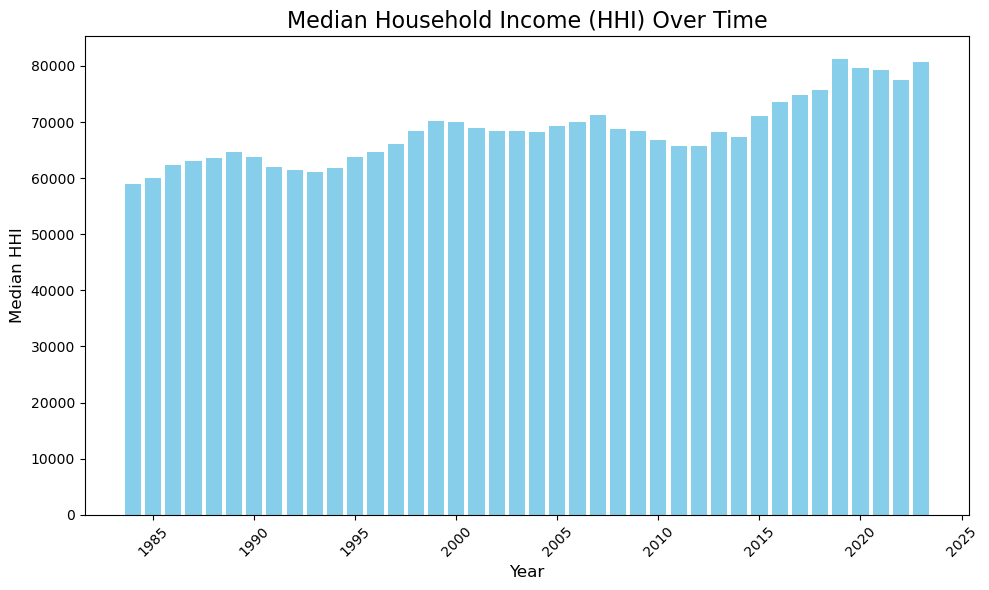

In [24]:
# Ensure that the 'Date' column is in datetime format
med_hhi_df['Date'] = pd.to_datetime(med_hhi_df['Date'])

# Extract the year from the 'Date' column for a clearer x-axis
med_hhi_df['Year'] = med_hhi_df['Date'].dt.year

# Create a bar graph of Median HHI over time
plt.figure(figsize=(10, 6))
plt.bar(med_hhi_df['Year'], med_hhi_df['Median HHI'], color='skyblue')

# Customize the plot
plt.title('Median Household Income (HHI) Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median HHI', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()

In [23]:
# Step 1: Ensure the 'DATE' column is in datetime format
med_hhi_df['Date'] = pd.to_datetime(med_hhi_df['Date'])

# Step 2: Filter the rows for the years 2018 to 2022
median_income_filtered_df = med_hhi_df[med_hhi_df['Date'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Display the filtered DataFrame
median_income_filtered_df.head()

,Date,Median HHI
34,2018-01-01,75790
35,2019-01-01,81210
36,2020-01-01,79560
37,2021-01-01,79260
38,2022-01-01,77540


In [21]:
# Step 1: Extract the year from the 'Date' column in the median income data
median_income_filtered_df['Year'] = median_income_filtered_df['Date'].dt.year

# Step 2: Group by 'Year' and calculate the average 'Median HHI' for each year
average_income_by_year = median_income_filtered_df.groupby('Year')['Median HHI'].mean().reset_index()

# Step 3: Rename the 'Median HHI' column to 'Average Median HHI'
average_income_by_year = average_income_by_year.rename(columns={'Median HHI': 'Average Median HHI'})

# Step 4: Filter the DataFrame for only the years 2018 to 2022 (already filtered above)
average_income_by_year = average_income_by_year[average_income_by_year['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Display the final DataFrame
print(average_income_by_year)

   Year  Average Median HHI
0  2018             75790.0
1  2019             81210.0
2  2020             79560.0
3  2021             79260.0
4  2022             77540.0


C:\Users\taire\AppData\Local\Temp\ipykernel_8912\619339507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_income_filtered_df['Year'] = median_income_filtered_df['Date'].dt.year


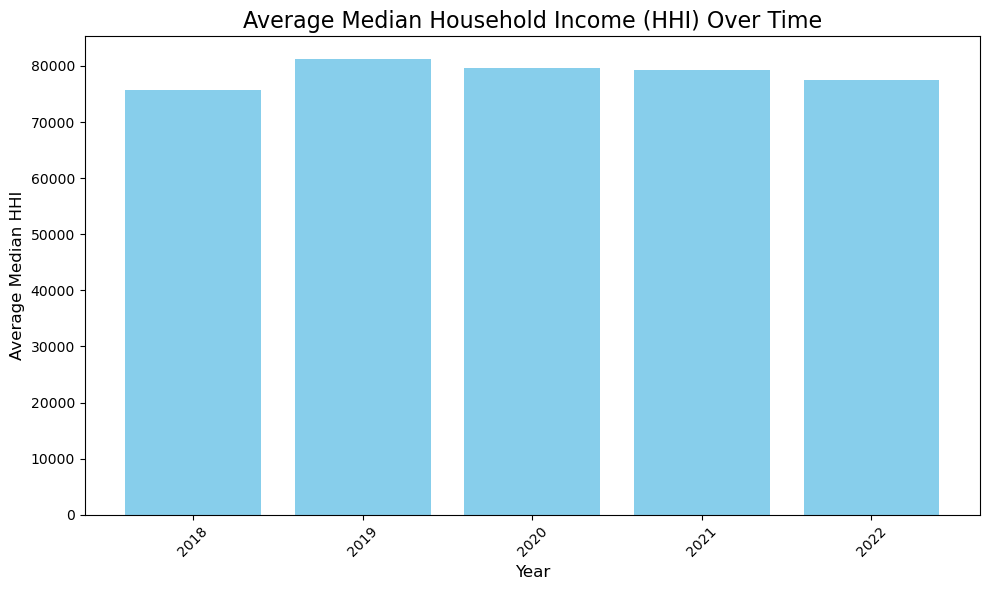

In [22]:
# Create a bar graph of Average Median HHI over time
plt.figure(figsize=(10, 6))
plt.bar(average_income_by_year['Year'], average_income_by_year['Average Median HHI'], color='skyblue')

# Customize the plot
plt.title('Average Median Household Income (HHI) Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Median HHI', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()

In [42]:
# Assuming the DataFrame is already loaded
# med_hhi_df = pd.read_csv('path_to_your_data.csv')

# Ensure that the 'Date' column is in datetime format
med_hhi_df['Date'] = pd.to_datetime(med_hhi_df['Date'])

# Filter the data for the years 2018 to 2022
med_hhi_filtered = med_hhi_df[(med_hhi_df['Date'] >= '2018-01-01') & (med_hhi_df['Date'] <= '2022-12-31')]

# Set 'Date' as the index for better formatting in the JSON output
med_hhi_filtered.set_index('Date', inplace=True)

# Output the filtered data to a JSON file
med_hhi_filtered.to_json('median_hhi_2018_2022.json', orient='index', date_format='iso')

print("Data successfully written to 'median_hhi_2018_2022.json'.")

Data successfully written to 'median_hhi_2018_2022.json'.


In [22]:

# Step 2: Merge the DataFrames on 'Year'
merged_df = pd.merge(average_price_by_year, average_unemployment_by_year, on='Year', how='outer')
merged_df = pd.merge(merged_df, average_mortgage_by_year, on='Year', how='outer')
merged_df = pd.merge(merged_df, average_income_by_year, on='Year', how='outer')

# Step 3: Display the merged DataFrame
print(merged_df)

   Year  Average Price  Average Unemployment Rate  \
0  2018  231312.598863                   3.891667   
1  2019  243067.762580                   3.675000   
2  2020  258567.500998                   8.091667   
3  2021  298386.401188                   5.350000   
4  2022  342811.156554                   3.633333   

   Average 30 YR Mortgage Rate  Average Median HHI  
0                     4.544615             75790.0  
1                     3.935769             81210.0  
2                     3.111698             79560.0  
3                     2.957692             79260.0  
4                     5.344038             77540.0  


In [30]:
# Step 1: Define the independent variables (Unemployment Rate, 30 yr mortgage rate, and Median HHI)
X = merged_df[['Average Unemployment Rate', 'Average 30 yr mortgage rate', 'Average Median HHI']]

# Step 2: Define the dependent variable (Average Home Price)
y = merged_df['Average Price']

# Step 3: Add a constant to the independent variables (this is the intercept for the regression)
X = sm.add_constant(X)

# Step 4: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 5: Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                 -2.377
Method:                 Least Squares   F-statistic:                   0.06155
Date:                Sat, 14 Sep 2024   Prob (F-statistic):              0.973
Time:                        18:09:16   Log-Likelihood:                -59.759
No. Observations:                   5   AIC:                             127.5
Df Residuals:                       1   BIC:                             126.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Users\taire\anaconda3\envs\dev\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [34]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
rental_df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394913,1,"New York, NY",msa,NY,2227.886183,2251.118894,2267.851695,2284.702372,2288.073225,...,3443.856725,3424.581955,3442.399810,3485.052220,3519.700761,3562.290444,3572.887480,3602.208908,3614.929134,3640.093145
2,753899,2,"Los Angeles, CA",msa,CA,2621.942240,2633.999717,2654.095188,2664.578607,2690.731090,...,4292.282261,4288.887028,4298.547999,4324.901797,4338.474621,4359.776105,4378.386198,4403.227148,4421.621816,4438.079122


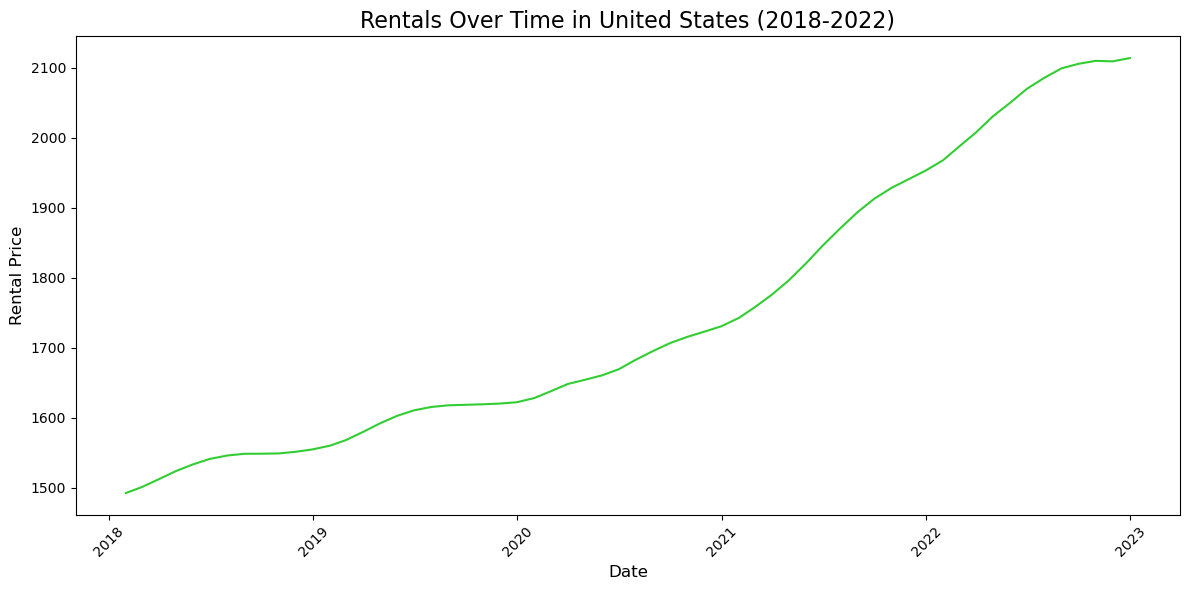

In [38]:
# Filter the data for the United States
us_rental_data = rental_df[rental_df['RegionName'] == 'United States']

# Drop unnecessary columns to focus on the time series data
us_rental_data = us_rental_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Transpose the DataFrame to get dates as index
us_rental_data = us_rental_data.T
us_rental_data.columns = ['Rentals']

# Convert the index to datetime format for filtering and plotting
us_rental_data.index = pd.to_datetime(us_rental_data.index)

# Filter the data for the years 2018 to 2022
us_rental_data_filtered = us_rental_data[(us_rental_data.index >= '2018-01-01') & (us_rental_data.index <= '2022-12-31')]

# Create a line chart for rentals over time (2018 to 2022)
plt.figure(figsize=(12, 6))
plt.plot(us_rental_data_filtered.index, us_rental_data_filtered['Rentals'], color='limegreen')
plt.title('Rentals Over Time in United States (2018-2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rental Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Filter the data for the United States
us_rental_data = rental_df[rental_df['RegionName'] == 'United States']

# Drop unnecessary columns to focus on the time series data
us_rental_data = us_rental_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Transpose the DataFrame to get dates as index
us_rental_data = us_rental_data.T
us_rental_data.columns = ['Rentals']

# Convert the index to datetime format for filtering
us_rental_data.index = pd.to_datetime(us_rental_data.index)

# Filter the data for the years 2018 to 2022
us_rental_data_filtered = us_rental_data[(us_rental_data.index >= '2018-01-01') & (us_rental_data.index <= '2022-12-31')]

# Output the filtered data to a JSON file
us_rental_data_filtered.to_json('us_rental_data_2018_2022.json', orient='index', date_format='iso')

print("Data successfully written to 'us_rental_data_2018_2022.json'.")

Data successfully written to 'us_rental_data_2018_2022.json'.


In [27]:
sales_count_df = pd.read_csv('../Source/Metro_sales_count_monthly.csv')
sales_count_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024
0,102001,0,United States,country,NaN,200263,231896,257463,283461,296547,...,258258,246648,211949,234310,282773,318615,350767,326229,340368,332735
1,394913,1,"New York, NY",msa,NY,8416,8883,9809,10081,10685,...,11143,10675,10345,8916,10063,10993,12208,12446,13878,14512
2,753899,2,"Los Angeles, CA",msa,CA,4141,5044,6065,6868,7222,...,5119,4974,4401,4980,6101,6714,7119,6380,7027,7315
3,394463,3,"Chicago, IL",msa,IL,5570,6908,7230,7931,8781,...,7022,7129,5512,5765,7661,9277,10195,9768,10487,10850
4,394514,4,"Dallas, TX",msa,TX,4875,5519,5988,6679,6672,...,4625,4706,4207,5137,6144,6969,7458,6465,6758,6677


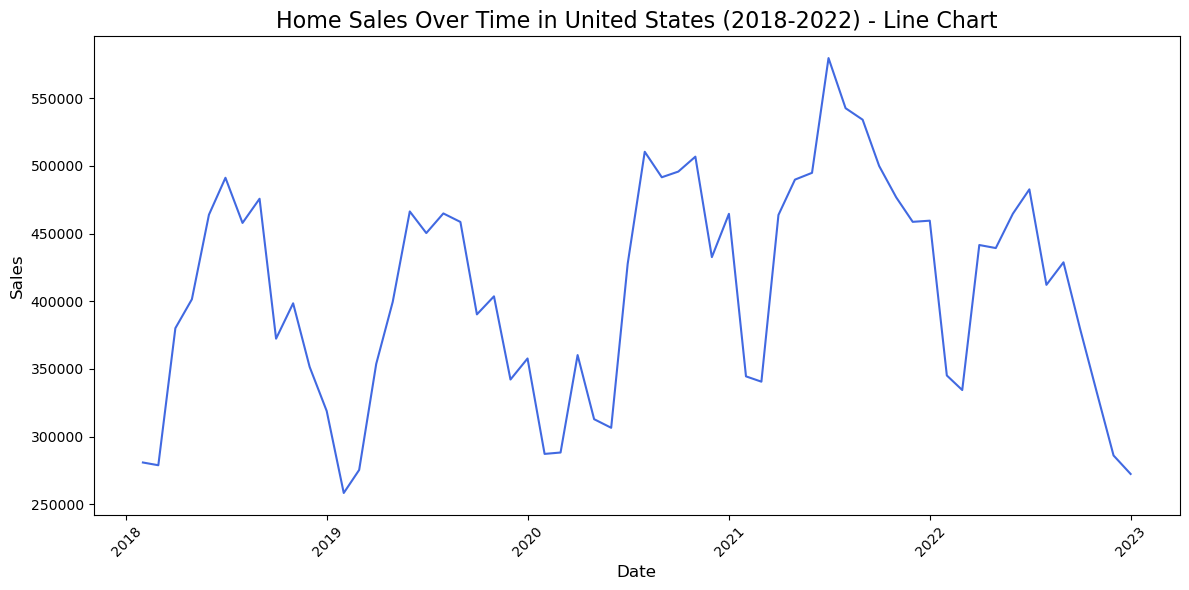

In [40]:
# Filter the data for the United States
region = 'United States'
sales_data = sales_count_df[sales_count_df['RegionName'] == region]

# Drop unnecessary columns to focus on the time series data
sales_data = sales_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Transpose the DataFrame to get dates as index
sales_data = sales_data.T
sales_data.columns = ['Sales']

# Convert the index to datetime format for plotting
sales_data.index = pd.to_datetime(sales_data.index)

# Filter the data for the years 2018 to 2022
sales_data_filtered = sales_data[(sales_data.index >= '2018-01-01') & (sales_data.index <= '2022-12-31')]

# Create a line chart for home sales over time (2018 to 2022)
plt.figure(figsize=(12, 6))
plt.plot(sales_data_filtered.index, sales_data_filtered['Sales'], color='#4169E1')
plt.title(f'Home Sales Over Time in {region} (2018-2022) - Line Chart', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Filter the data for the United States
us_sales_data = sales_count_df[sales_count_df['RegionName'] == 'United States']

# Drop unnecessary columns to focus on the time series data
us_sales_data = us_sales_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Transpose the DataFrame to get dates as index
us_sales_data = us_sales_data.T
us_sales_data.columns = ['Sales']

# Convert the index to datetime format for filtering
us_sales_data.index = pd.to_datetime(us_sales_data.index)

# Filter the data for the years 2018 to 2022
us_sales_data_filtered = us_sales_data[(us_sales_data.index >= '2018-01-01') & (us_sales_data.index <= '2022-12-31')]

# Output the filtered data to a JSON file
us_sales_data_filtered.to_json('us_sales_data_2018_2022.json', orient='index', date_format='iso')

print("Data successfully written to 'us_sales_data_2018_2022.json'.")

Data successfully written to 'us_sales_data_2018_2022.json'.
